In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Classification model

## Load the MNIST dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Build a simplified model

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(32, activation='sigmoid'),
    Dense(10, activation='softmax')
])

## Compiling & Training

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 1.5190 - accuracy: 0.4534 - val_loss: 1.3746 - val_accuracy: 0.5167
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.2972 - accuracy: 0.5483 - val_loss: 1.2495 - val_accuracy: 0.5416
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 1.1305 - accuracy: 0.6024 - val_loss: 1.0459 - val_accuracy: 0.6292
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.0704 - accuracy: 0.6250 - val_loss: 0.9542 - val_accuracy: 0.6900
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.9512 - accuracy: 0.6847 - val_loss: 0.9397 - val_accuracy: 0.6826


### Evaluate the model

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
# print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.9542 - accuracy: 0.6726


In [ ]:
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Test accuracy: 67.26%


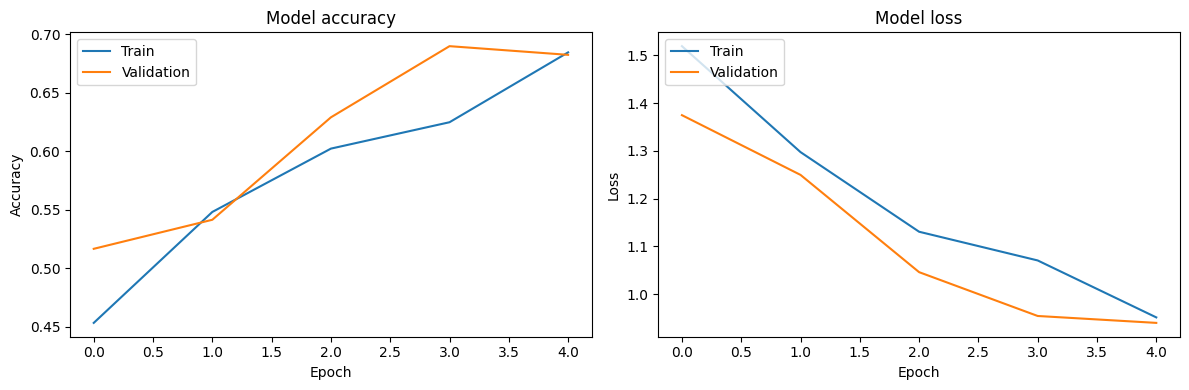

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Testing
Using sklearn.metrics.classification_report

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_test, y_pred_classes)
print(report)

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.68      0.82      0.75       980
           1       0.90      0.88      0.89      1135
           2       0.64      0.68      0.66      1032
           3       0.48      0.60      0.53      1010
           4       0.71      0.64      0.67       982
           5       0.70      0.43      0.53       892
           6       0.86      0.79      0.83       958
           7       0.80      0.81      0.80      1028
           8       0.42      0.32      0.36       974
           9       0.57      0.68      0.62      1009

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.66     10000
weighted avg       0.68      0.67      0.67     10000



# Improving the model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Print the shape of the data
print(f"Training data shape: {train_images.shape}, Training labels shape: {train_labels.shape}")
print(f"Test data shape: {test_images.shape}, Test labels shape: {test_labels.shape}")

11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


In [ ]:
# Define the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training

In [ ]:
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2012 - accuracy: 0.9410 - val_loss: 0.1066 - val_accuracy: 0.9723
Epoch 2/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1297 - accuracy: 0.9603 - val_loss: 0.0927 - val_accuracy: 0.9735
Epoch 3/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1009 - accuracy: 0.9692 - val_loss: 0.0738 - val_accuracy: 0.9777
Epoch 4/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0852 - accuracy: 0.9733 - val_loss: 0.0768 - val_accuracy: 0.9772
Epoch 5/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0736 - accuracy: 0.9771 - val_loss: 0.0726 - val_accuracy: 0.9798


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9765
Test accuracy: 97.65%


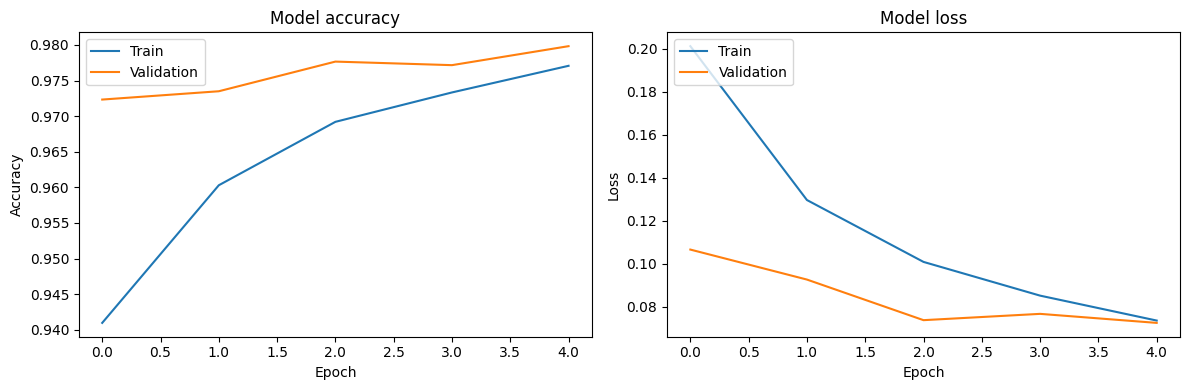

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Testing

<ipython-input-11-b1e8799f9672>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, ind+1)


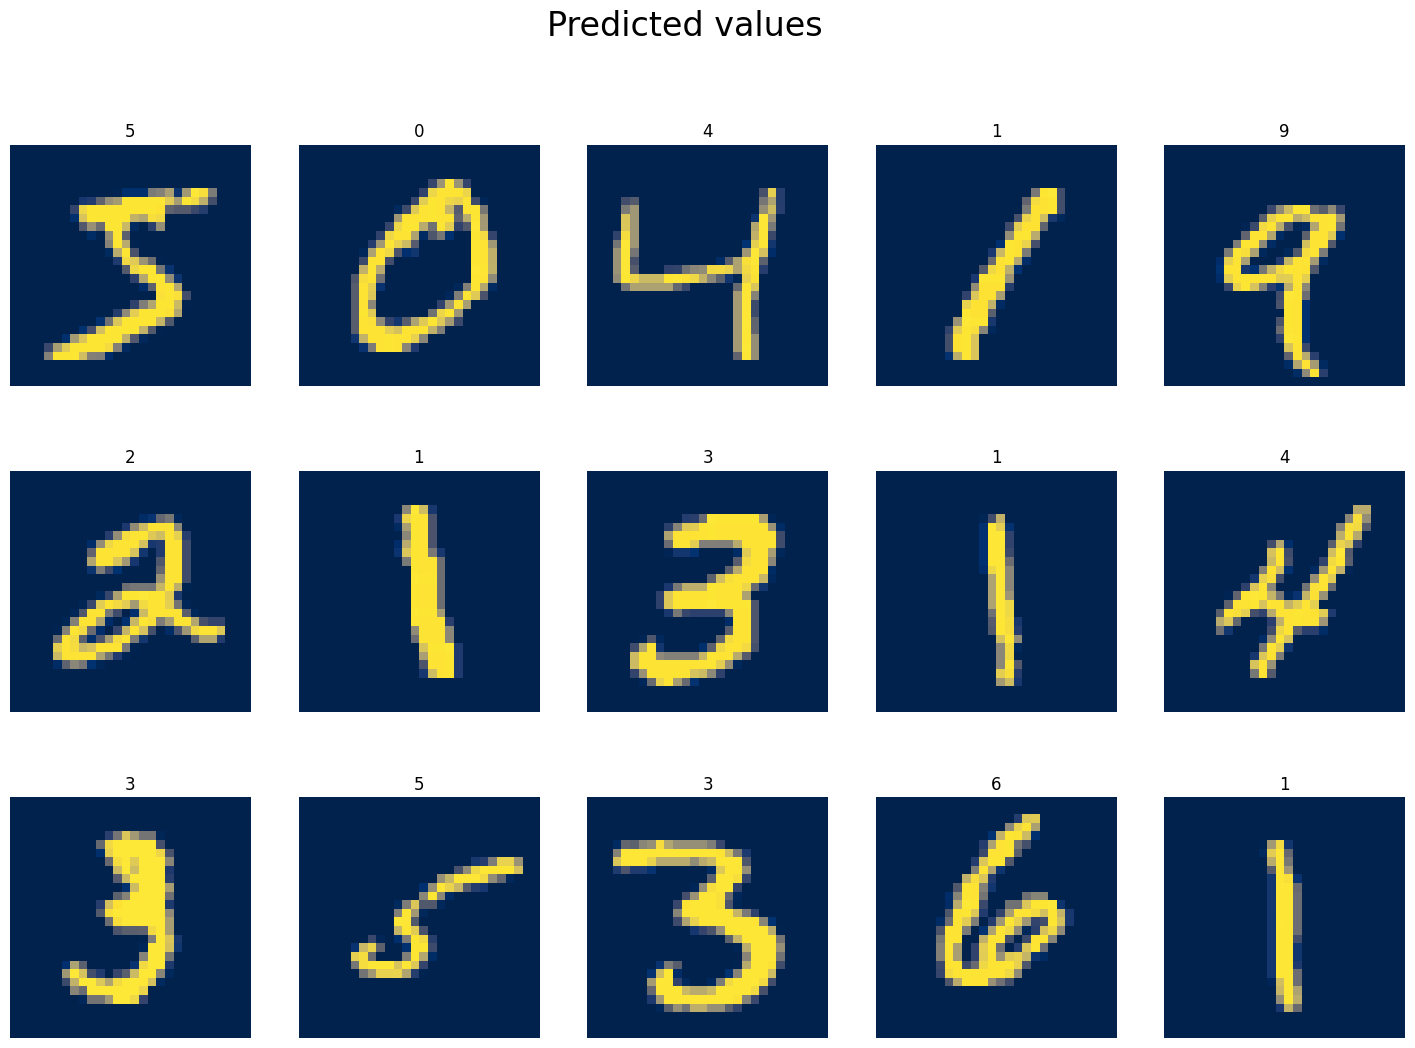

In [ ]:
# predicted targets of each images
# (labels above the images are predicted labels)
fig, ax = plt.subplots(figsize=(18, 12))
for ind, row in enumerate(train_images[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(train_labels[ind])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')

In [ ]:
# Predict the labels for the test set
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
# Generate the classification report
print("\nClassification Report:")
print(classification_report(test_labels, y_pred_classes))


313/313 [==============================] - 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

